In [243]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, normalized_mutual_info_score
from sklearn.naive_bayes import GaussianNB



---
# **Dataset Preparation**
---

In [51]:
data = fetch_ucirepo(id=80)

In [52]:
print(f"Name : {data.metadata.name}")
print(f"Instances : {data.metadata.num_instances}")
print(f"Features : {data.metadata.num_features}")

Name : Optical Recognition of Handwritten Digits
Instances : 5620
Features : 64


In [74]:
# print(data.data.features)
X = pd.DataFrame(data.data.features)
X


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,4,0,0,0,2,14,15,9,0,0
5616,0,0,6,16,13,11,1,0,0,0,...,1,0,0,0,6,16,14,6,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,0,2,9,13,6,0,0
5618,0,0,2,10,7,0,0,0,0,0,...,2,0,0,0,5,12,16,12,0,0


In [75]:
Y = pd.DataFrame(data.data.targets)
Y

,class
0,0
1,0
2,7
3,4
4,6
...,...
5615,9
5616,0
5617,8
5618,9


In [55]:
datastore = X.copy()
datastore['target'] = Y
datastore

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64,target
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
5616,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
5618,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


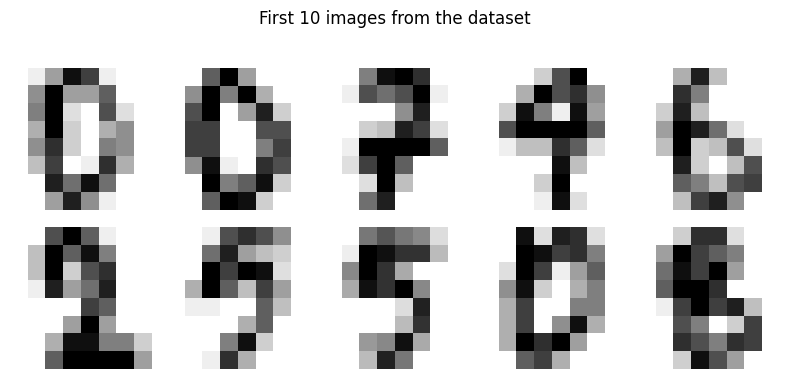

In [167]:
fig , axes = plt.subplots(2, 5, figsize=(8, 4))
fig.suptitle("First 10 images from the dataset")

for i in range(10):
    row = X.iloc[i].values.reshape(8,8)
    ax = axes[i//5, i%5]
    ax.imshow(row, cmap='gray_r')
    # ax.title("Image")
    ax.axis('off')

plt.tight_layout()
# plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
datastore.to_csv('Datasets/OCR_Digits.csv', index=False)

---
 # **PREPROCESSING DATA** 
---

In [102]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [142]:
Y_train = Y_train.values.ravel()
Y_train

array([4, 4, 4, ..., 2, 4, 0], shape=(4496,))

In [148]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train) ,columns=X.columns)
X_scaled


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0.0,0.000,0.0000,0.0625,0.9375,0.3125,0.000,0.0,0.0,0.000000,...,0.0000,0.000000,0.0,0.0,0.0000,0.0625,1.0000,0.3125,0.00,0.00
1,0.0,0.000,0.0000,0.6250,0.6250,0.0000,0.000,0.0,0.0,0.000000,...,0.0000,0.000000,0.0,0.0,0.0000,0.8125,0.2500,0.0000,0.00,0.00
2,0.0,0.000,0.0000,0.6250,0.6250,0.0000,0.000,0.0,0.0,0.000000,...,0.0000,0.000000,0.0,0.0,0.0000,0.8125,0.5625,0.0000,0.00,0.00
3,0.0,0.000,0.0000,0.1250,0.9375,0.3125,0.000,0.0,0.0,0.000000,...,0.0000,0.000000,0.0,0.0,0.0000,0.0625,0.9375,0.1875,0.00,0.00
4,0.0,0.000,0.1250,0.6250,0.4375,0.0000,0.000,0.0,0.0,0.200000,...,0.5625,0.000000,0.0,0.0,0.1875,0.6875,0.5000,0.5000,0.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,0.0,0.000,0.0000,0.0000,0.6875,0.9375,0.125,0.0,0.0,0.000000,...,0.0000,0.000000,0.0,0.0,0.0000,0.0000,0.7500,0.6250,0.00,0.00
4492,0.0,0.125,0.7500,1.0000,1.0000,0.9375,0.000,0.0,0.0,0.466667,...,0.0000,0.000000,0.0,0.0,0.8125,0.5625,0.0000,0.0000,0.00,0.00
4493,0.0,0.000,0.5625,1.0000,0.8125,0.0625,0.000,0.0,0.0,0.533333,...,0.2500,0.076923,0.0,0.0,0.5000,1.0000,1.0000,1.0000,1.00,0.75
4494,0.0,0.000,0.1875,0.9375,0.1875,0.0000,0.000,0.0,0.0,0.000000,...,0.0000,0.000000,0.0,0.0,0.2500,1.0000,0.3125,0.0000,0.00,0.00


# *Dictionary to store precisions for each alogrithm*

In [224]:
models_precision = {}

---
# **K MEANS CLUSTERING**
---

In [149]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=10, random_state=42)

In [150]:
clusters = pd.DataFrame(kmeans.labels_)
clusters 

,0
0,7
1,7
2,7
3,7
4,2
...,...
4491,8
4492,9
4493,4
4494,7


In [151]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=['PC1', 'PC2'])
X_pca['target'] = clusters
X_pca

,PC1,PC2,target
0,1.702943,0.739525,7
1,0.509402,1.239747,7
2,1.182600,0.770416,7
3,0.988587,1.402185,7
4,0.207957,-0.011958,2
...,...,...,...
4491,0.047701,1.206117,8
4492,-1.234313,0.959548,9
4493,-0.748898,-0.552761,4
4494,0.922069,0.761243,7


In [152]:
cluster_centers = kmeans.cluster_centers_
cluster_centers = pca.transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns=['PC1', 'PC2'])
cluster_centers


d:\Python 313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,PC1,PC2
0,-0.069640,0.460542
1,-0.130710,0.047637
2,1.360115,-0.427952
3,-0.657566,-0.670300
4,-0.386264,-0.669113
5,0.684437,-0.779044
6,-0.616939,1.060652
7,1.229773,0.980814
8,-0.111422,0.898015
9,-0.829591,0.921247


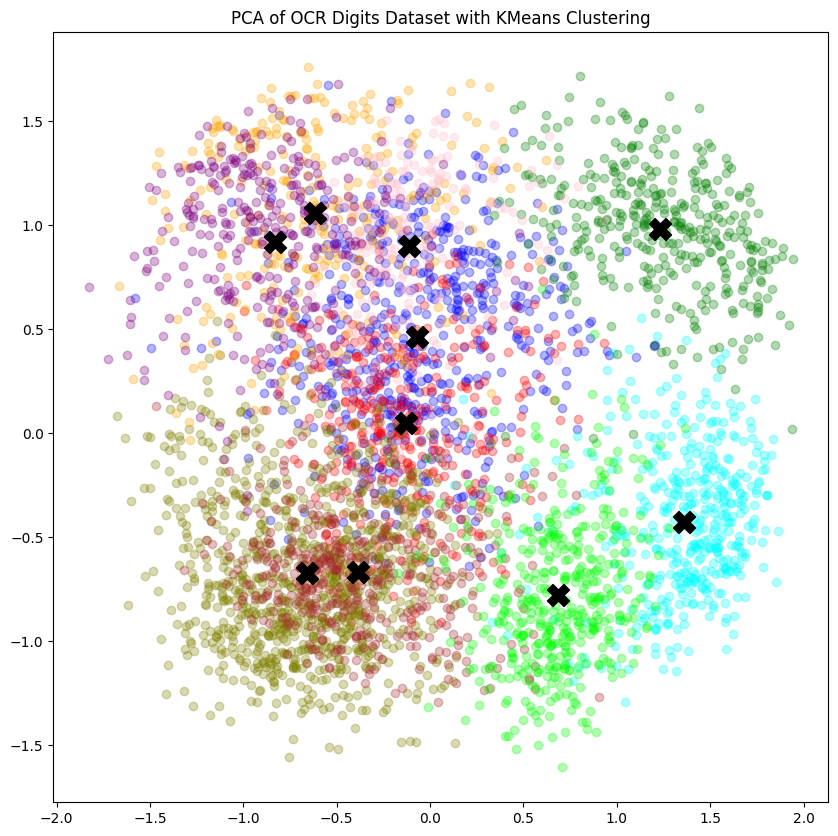

In [156]:
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[X_pca['target'] == 0]['PC1'], X_pca[X_pca['target'] == 0]['PC2'], c='blue', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 1]['PC1'], X_pca[X_pca['target'] == 1]['PC2'], c='red', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 2]['PC1'], X_pca[X_pca['target'] == 2]['PC2'], c='cyan', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 3]['PC1'], X_pca[X_pca['target'] == 3]['PC2'], c='olive', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 4]['PC1'], X_pca[X_pca['target'] == 4]['PC2'], c='brown', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 5]['PC1'], X_pca[X_pca['target'] == 5]['PC2'], c='lime', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 6]['PC1'], X_pca[X_pca['target'] == 6]['PC2'], c='orange', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 7]['PC1'], X_pca[X_pca['target'] == 7]['PC2'], c='green', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 8]['PC1'], X_pca[X_pca['target'] == 8]['PC2'], c='pink', label='Cluster 0' , alpha=0.3)
plt.scatter(X_pca[X_pca['target'] == 9]['PC1'], X_pca[X_pca['target'] == 9]['PC2'], c='purple', label='Cluster 0' , alpha=0.3)
# plt.scatter(X_pca['PC1'], X_pca['PC2'], c=X_pca['target'], cmap='viridis', alpha=0.5, label='Clusters')

plt.scatter(cluster_centers['PC1'], cluster_centers['PC2'], c='black', marker='X', s=250, label='Centroids')  
plt.title('PCA of OCR Digits Dataset with KMeans Clustering')
plt.show()


In [260]:

nmi = normalized_mutual_info_score(Y_train, kmeans.labels_)
nmi = float(nmi)

print(f"Normalized Mutual Information (NMI): {nmi*100:.4f}")
models_precision['KMeans'] = nmi

Normalized Mutual Information (NMI): 71.3218


---
# **KNN CLASSIFICATION**
---

In [177]:
knn_score = {}

In [178]:
for i in range(10):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    print(f"n_neighbors = {i+1} :")
    score = knn.score(X_test, Y_test)*100
    knn_score[i+1] = score
    print(f"KNN score : {score}")
    print(classification_report(Y_test, Y_pred))
    # print(confusion_matrix(Y_test, Y_pred))
    print("\n\n")


n_neighbors = 1 :
KNN score : 98.66548042704626
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.95      1.00      0.98       102
           2       0.99      1.00      1.00       107
           3       0.98      0.97      0.97       118
           4       1.00      1.00      1.00       117
           5       0.98      0.99      0.98        97
           6       1.00      0.99      1.00       123
           7       0.99      1.00      1.00       124
           8       0.99      0.97      0.98       105
           9       0.97      0.95      0.96       123

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124




n_neighbors = 2 :
KNN score : 98.39857651245552
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.94      1.00

{1: 98.66548042704626, 2: 98.39857651245552, 3: 98.93238434163702, 4: 98.84341637010677, 5: 99.11032028469751, 6: 98.39857651245552, 7: 98.57651245551602, 8: 98.48754448398577, 9: 98.57651245551602, 10: 98.66548042704626}


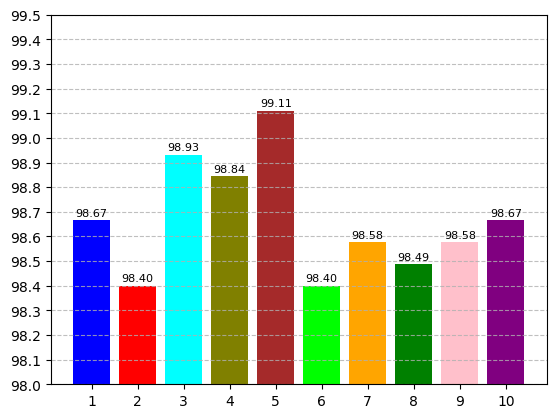

In [254]:
print(knn_score)
colors = ["blue", "red", "cyan", "olive", "brown", "lime", "orange", "green", "pink", "purple"]
plt.yticks(np.arange(0, 100 , 0.1))
plt.xticks(np.arange(1, 11, 1))
plt.ylim(98,99.5)
plt.bar(knn_score.keys(), knn_score.values(), color=colors)
plt.grid(axis='y', linestyle='--', alpha=0.8)
for i , (label,value) in enumerate(knn_score.items()):
    plt.text(label, value+0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=8)

In [249]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(f"n_neighbors = 5 :")
score = knn.score(X_test, Y_test)*100
print(f"KNN score : {score}")
reportKNN = classification_report(Y_test, Y_pred , output_dict=True)
print(f"Classification Report:\n{reportKNN}")
print(confusion_matrix(Y_test, Y_pred))

n_neighbors = 5 :
KNN score : 99.11032028469751
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 108.0}, '1': {'precision': 0.9807692307692307, 'recall': 1.0, 'f1-score': 0.9902912621359223, 'support': 102.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 107.0}, '3': {'precision': 0.9913793103448276, 'recall': 0.9745762711864406, 'f1-score': 0.9829059829059829, 'support': 118.0}, '4': {'precision': 1.0, 'recall': 0.9914529914529915, 'f1-score': 0.9957081545064378, 'support': 117.0}, '5': {'precision': 0.9896907216494846, 'recall': 0.9896907216494846, 'f1-score': 0.9896907216494846, 'support': 97.0}, '6': {'precision': 0.991869918699187, 'recall': 0.991869918699187, 'f1-score': 0.991869918699187, 'support': 123.0}, '7': {'precision': 0.992, 'recall': 1.0, 'f1-score': 0.9959839357429718, 'support': 124.0}, '8': {'precision': 0.9904761904761905, 'recall': 0.9904761904761905, 'f1-score': 0.9904761904761905, 'support': 105.0}, 

In [250]:
reportKNN = reportKNN["weighted avg"]
models_precision["KNN"] = reportKNN

---
# **NAIVE BAYES**
---

In [245]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

GaussianNB()

In [246]:
Y_pred = naive_bayes.predict(X_test)
print(f"Naive Bayes score : {naive_bayes.score(X_test, Y_test)*100}")

Naive Bayes score : 80.16014234875445


In [247]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[108   0   0   0   0   0   0   0   0   0]
 [  0  86   0   0   0   0   3   0   9   4]
 [  0   5  75   0   0   0   0   0  27   0]
 [  0   0   0  72   0   0   0   3  40   3]
 [  2   7   0   0  75   0   1  25   6   1]
 [  2   2   1   1   1  65   1   2  17   5]
 [  1   1   0   0   0   1 119   0   1   0]
 [  0   0   0   0   0   0   0 122   1   1]
 [  1   2   0   0   0   1   0   1 100   0]
 [  3   6   0   2   0   0   0  12  21  79]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       108
           1       0.79      0.84      0.82       102
           2       0.99      0.70      0.82       107
           3       0.96      0.61      0.75       118
           4       0.99      0.64      0.78       117
           5       0.97      0.67      0.79        97
           6       0.96      0.97      0.96       123
           7       0.74      0.98      0.84       124
           8       0.45      0.95      0.61       105
           9       0.85     

In [ ]:
reportNB = classification_report(Y_test, Y_pred , output_dict=True)
reportNB = reportNB["weighted avg"]

{'precision': 0.8630896978949393,
 'recall': 0.8016014234875445,
 'f1-score': 0.8076502139547936,
 'support': 1124.0}

In [251]:
models_precision["Naive Bayes"] = reportNB
models_precision

{'KMeans': 71.3218404703545,
 'KNN': {'precision': 0.9911291994298499,
  'recall': 0.9911032028469751,
  'f1-score': 0.9910965096353662,
  'support': 1124.0},
 'Naive Bayes': {'precision': 0.8630896978949393,
  'recall': 0.8016014234875445,
  'f1-score': 0.8076502139547936,
  'support': 1124.0}}

In [261]:
precision_scores = {
    "KMeans": models_precision["KMeans"]*100,
    "KNN": models_precision["KNN"]["f1-score"]*100,
    "Naive Bayes": models_precision["Naive Bayes"]["f1-score"]*100
}
precision_scores

{'KMeans': 71.3218404703545,
 'KNN': 99.10965096353662,
 'Naive Bayes': 80.76502139547937}

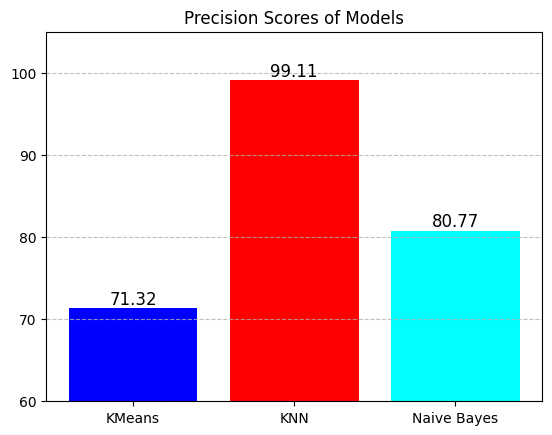

In [ ]:
colors = ["blue", "red", "cyan"]
plt.yticks(np.arange(0, 105 , 10))
plt.ylim(60,105)
plt.title("Precision Scores of Models")
plt.bar(precision_scores.keys(), precision_scores.values(), color=colors)
plt.grid(axis='y', linestyle='--', alpha=0.8)
for i , (label,value) in enumerate(precision_scores.items()):
    plt.text(label, value+0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=12)

[99.11291994298499, 99.11032028469751, 99.10965096353662]
[86.30896978949393, 80.16014234875445, 80.76502139547937]


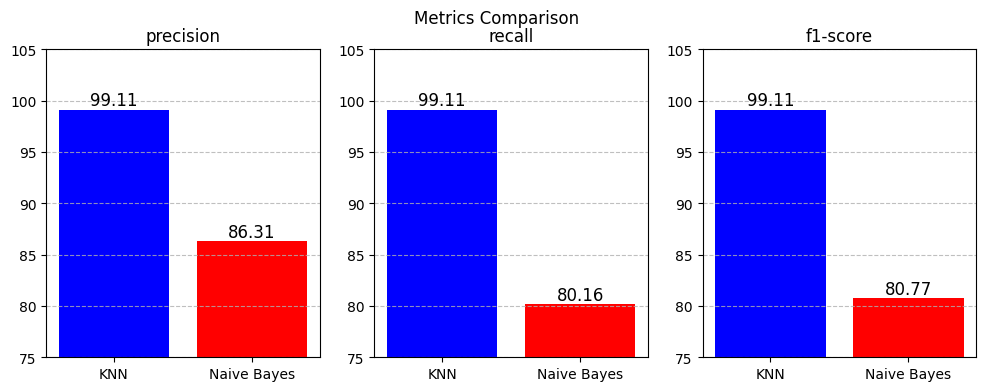

In [278]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("Metrics Comparison")
metrics = ["precision", "recall", "f1-score"]

KNNmetrics = []
NBmetrics = []
for i in range(3):
    KNNmetrics.append(models_precision["KNN"][metrics[i]]*100)
    NBmetrics.append(models_precision["Naive Bayes"][metrics[i]]*100)
    

for i in range(3):
    axes[i].bar(["KNN", "Naive Bayes"], [KNNmetrics[i], NBmetrics[i]], color=colors[:2])
    axes[i].set_title(metrics[i])
    axes[i].set_ylim(75, 105)
    axes[i].grid(axis='y', linestyle='--', alpha=0.8)
    for j , (label,value) in enumerate(zip(["KNN", "Naive Bayes"], [KNNmetrics[i], NBmetrics[i]])):
        axes[i].text(label, value+0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=12)

print(KNNmetrics)
print(NBmetrics)